In [49]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn import cross_validation
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
%matplotlib inline


In [46]:
# load the feature array
# x_fields = pd.read_csv('./clean_data/feature_field_list.txt')
feature_arr = pd.read_pickle('./clean_data/feature_array')

attract_y = feature_arr['attractive']
attract_y = attract_y.values

feature_x = feature_arr.drop(['attractive','unattractive'], axis=1)
x_fields = list(feature_x.columns.values)
feature_x = feature_x.values

In [47]:
# Run linear regression multiple times. 
itr_num = 50
random_seed = np.random.randint(1, 1000, size=itr_num)
test_corr_list = np.zeros((itr_num, 1))

coef_list = np.zeros((len(x_fields), itr_num))
intercept_list = np.zeros((itr_num, 1))
alpha_list = np.zeros((itr_num, 1))


for cur_itr in range(itr_num):
    print cur_itr
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(feature_x, attract_y, test_size=0.5, random_state=random_seed[cur_itr])
    clf = linear_model.RidgeCV(alphas=np.logspace(-3, 1, num=20), fit_intercept=True)
    clf.fit(x_train, y_train)
    
    coef_list[:, cur_itr] = clf.coef_
    intercept_list[cur_itr] = clf.intercept_
    alpha_list[cur_itr] = clf.alpha_    
        
    y_test_pred = clf.predict(x_test)
    corr = spearmanr(y_test, y_test_pred)
    test_corr_list[cur_itr] = corr[0]

test_corr_list.mean()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


0.8186406344105448

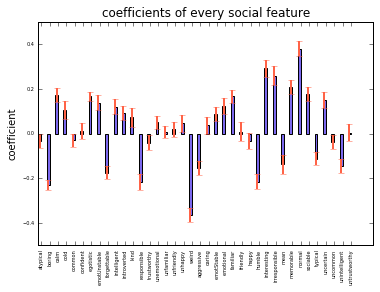

In [57]:
# Now plot the social features with error bar. 
coef_mean = coef_list.mean(axis=1)
coef_std = coef_list.std(axis=1)

# plot
n = len(coef_mean)  # number of data entries
ind = np.arange(n)  # the x locations for the groups
width = 0.35 # bar width

fig, ax = plt.subplots()

rects1 = ax.bar(ind, coef_mean,                  # data
                width,                          # bar width
                color='MediumSlateBlue',        # bar colour
                yerr=coef_std,                  # data for error bars
                error_kw={'ecolor':'Tomato',    # error-bars colour
                          'linewidth':2})       # error-bar width

axes = plt.gca()
axes.set_ylim([-0.5, 0.5])


ax.set_ylabel('coefficient')
ax.set_title('coefficients of every social feature')

ax.set_xticks(ind + width)
ax.set_xticklabels(x_fields, rotation=90)
plt.tick_params(labelsize=5)
plt.savefig('./figs/social_feature_bargraph.png')
plt.show()

In [54]:
x_test.shape

(1111, 38)